In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# import time

/Users/championlin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def add_layer(data, input_size, output_size, activation = None):
    Weights = tf.Variable(tf.random_normal(shape=[input_size, output_size]))
    biases = tf.zeros(shape=[1, output_size]) + 0.1
    Wx_plus_biases = tf.matmul(data, Weights) + biases
    
    if activation == None:
        output = Wx_plus_biases
    else:
        output = activation(Wx_plus_biases)
        
    return output

In [3]:
x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) + 0.5 + noise

In [4]:
print(x_data.shape)
print(y_data.shape)

(300, 1)
(300, 1)


---------------

In [5]:
#1 input_layer 1 hidden_layer with 10 neurun 1 output_layer

In [6]:
xs = tf.placeholder(dtype=tf.float32, shape=[None, 1])
ys = tf.placeholder(dtype=tf.float32, shape=[None, 1])

l1 = add_layer(xs, 1, 10, activation=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(loss)

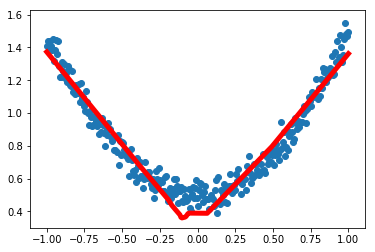

In [12]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_data, y_data)
    
    for i in range(1000):
        sess.run(train, feed_dict = {xs : x_data, ys : y_data})
        if i % 50 == 0:
            try:
                lines = ax.lines.remove(lines[0])
            except Exception:
                pass
            preds = sess.run(prediction, feed_dict = {xs : x_data})
    lines = ax.plot(x_data, preds, 'r-', lw = 5)
#             plt.ion()
#             plt.show()
#             plt.pause(0.1)
#             ax.plot(x_data, preds, 'r-', lw = 5)
    plt.ion()
    plt.show(block = False)
#             print(sess.run(loss, feed_dict = {xs : x_data, ys : y_data}))